In [1]:
import pandas as pd
import numpy as np
import random
import sklearn.datasets as datasets
import sys

sys.path.insert(1, '..')
from check_data_consistency import DataConsistencyChecker


In [2]:
pd.options.display.max_columns = 1000
pd.options.display.max_colwidth = 1000
pd.options.display.max_rows = 1000
pd.options.display.width = 10000

In [11]:
data = datasets.fetch_california_housing()
df = pd.read_csv("power consumption.csv") #https://www.kaggle.com/datasets/saugataroyarghya/resume-dataset
df.head(2)

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1,Zone 2,Zone 3
0,01-01-2017 00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,01-01-2017 00:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434


In [12]:
dc = DataConsistencyChecker()
dc.init_data(df)

In [13]:
# Run a small set of tests to start. In this example, we run a single test.

_ = dc.check_data_quality()

Executing test   0: MISSING_VALUES                
Executing test   1: RARE_VALUES                   
Executing test   2: UNIQUE_VALUES                 
Executing test   3: PREV_VALUES_DT                
Executing test   4: MATCHED_MISSING               
Executing test   5: OPPOSITE_MISSING              
Executing test   6: SAME_VALUES                   
Executing test   7: SAME_OR_CONSTANT              
Executing test   8: UNIQUE_PAIR                   
Executing test   9: POSITIVE                      
Executing test  10: NEGATIVE                      
Executing test  11: NUMBER_DECIMALS               
Executing test  12: RARE_DECIMALS                 
Executing test  13: COLUMN_ORDERED_ASC            
Executing test  14: COLUMN_ORDERED_DESC           
Executing test  15: COLUMN_TENDS_ASC              
Executing test  16: COLUMN_TENDS_DESC             
Executing test  17: SIMILAR_PREVIOUS              
Executing test  18: UNUSUAL_ORDER_MAGNITUDE       
Executing test  19: FEW_NEIGHBO

In [14]:
# In the next few cells, we look at the output of the tests.

dc.summarize_patterns_and_exceptions()

,Test ID,Number Patterns without Exceptions,Number Patterns with Exceptions
0,MISSING_VALUES,9,
1,UNIQUE_VALUES,1,
2,UNIQUE_PAIR,,1
3,POSITIVE,8,
4,NUMBER_DECIMALS,7,
5,COLUMN_ORDERED_ASC,1,
6,COLUMN_TENDS_ASC,1,
7,SIMILAR_PREVIOUS,3,5
8,FEW_WITHIN_RANGE,,1
9,NON_ZERO,8,


In [15]:
# Run a small set of tests to start. In this example, we run a single test.

_ = dc.check_data_quality(execute_list=['SIMILAR_PREVIOUS'])

Executing test  17: SIMILAR_PREVIOUS              

Data consistency check complete.
Analysed 52,416 rows, 9 columns
Executed 1 tests.

Patterns without Exceptions:
Found 3 patterns without exceptions
1 tests (100.00% of tests) identified at least one pattern without exceptions each. 
By default some patterns are not listed in calls to display_detailed_results().

Patterns with Exceptions:
Found 5 patterns with exceptions
1 tests (100.00% of tests) flagged at least one exception each.
Flagged 165 row(s) with at least one exception.
Flagged 5 column(s) with at least one exception.


# Patterns List (short list only)

,Test ID,Column(s),Description of Pattern,Pattern ID
0,SIMILAR_PREVIOUS,Temperature,"The values in ""Temperature"" are consistently similar to the previous value, more so than they are si...",0
1,SIMILAR_PREVIOUS,Zone 3,"The values in ""Zone 3 "" are consistently similar to the previous value, more so than they are simil...",1
2,SIMILAR_PREVIOUS,DateTime,"The values in ""DateTime"" are consistently similar to the previous value, more so than they are simil...",2


# Patterns by Test and Feature

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1,Zone 2,Zone 3
Test ID,,,,,,,,,
SIMILAR_PREVIOUS,✔,✔,,,,,,,✔


# Exceptions List

,Test ID,Column(s),Description of Pattern,Number of Exceptions,Issue ID
0,SIMILAR_PREVIOUS,Humidity,"The values in ""Humidity"" are consistently similar to the previous value, more so than they are simil...",2,0
1,SIMILAR_PREVIOUS,Wind Speed,"The values in ""Wind Speed"" are consistently similar to the previous value, more so than they are sim...",1,1
2,SIMILAR_PREVIOUS,general diffuse flows,"The values in ""general diffuse flows"" are consistently similar to the previous value, more so than t...",160,2
3,SIMILAR_PREVIOUS,Zone 1,"The values in ""Zone 1"" are consistently similar to the previous value, more so than they are similar...",1,3
4,SIMILAR_PREVIOUS,Zone 2,"The values in ""Zone 2 "" are consistently similar to the previous value, more so than they are simil...",1,4


# Exceptions Summary by Test and Feature

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1,Zone 2,Zone 3
Test ID,,,,,,,,,
SIMILAR_PREVIOUS,,,2,1,160,,1,1,


# Exceptions Summary by Test

,Number of Columns Flagged At Least Once,Number of Issues Total
Test ID,,
SIMILAR_PREVIOUS,5,165


# Summary of Patterns and Exceptions (all tests)

,Test ID,Number Patterns without Exceptions,Number Patterns with Exceptions
0,SIMILAR_PREVIOUS,3,5


# Final Scores by Row of the Data

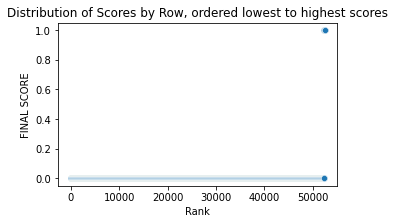

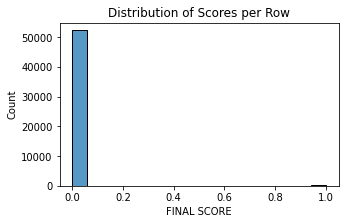

# Final Scores by Feature

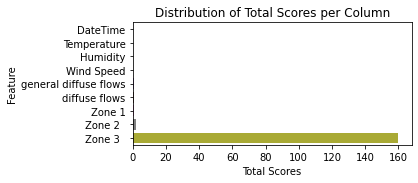

# Final Scores by Test

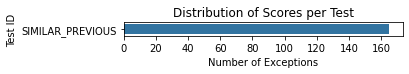

In [16]:
dc.quick_report()

In [19]:
dc.display_detailed_results(test_id_list=['POSITIVE'])

### Columns(s): Humidity

**Issue&nbsp;ID**:&nbsp;0

A&nbsp;strong&nbsp;pattern,&nbsp;and&nbsp;exceptions&nbsp;to&nbsp;the&nbsp;pattern,&nbsp;were&nbsp;found.<br>

**Description**:&nbsp;The&nbsp;values&nbsp;in&nbsp;"Humidity"&nbsp;are&nbsp;consistently&nbsp;similar&nbsp;to&nbsp;the&nbsp;previous&nbsp;value,&nbsp;more&nbsp;so&nbsp;than&nbsp;they&nbsp;are<br>similar&nbsp;to&nbsp;the&nbsp;median&nbsp;value&nbsp;of&nbsp;the&nbsp;column&nbsp;(69.86),&nbsp;with&nbsp;exceptions.

**Number&nbsp;of&nbsp;exceptions**:&nbsp;2&nbsp;(0.0038%&nbsp;of&nbsp;rows)

**Examples&nbsp;of&nbsp;values&nbsp;NOT&nbsp;flagged&nbsp;(showing&nbsp;a&nbsp;consecutive&nbsp;set&nbsp;of&nbsp;rows)**:

,Humidity
30403,67.660000
30404,67.860000
30405,67.800000
30406,67.200000
30407,66.930000
30408,66.970000
30409,66.730000
30410,66.530000
30411,66.370000
30412,65.400000


**Flagged&nbsp;values**:

,Humidity
29219,36.810000
48096,55.770000


Showing&nbsp;a&nbsp;flagged&nbsp;example&nbsp;(row&nbsp;29219)&nbsp;with&nbsp;5&nbsp;rows&nbsp;before&nbsp;and&nbsp;5&nbsp;rows&nbsp;after&nbsp;(if&nbsp;available)&nbsp;the&nbsp;flagged&nbsp;row

,Humidity
29214,73.400000
29215,74.300000
29216,75.200000
29217,75.300000
29218,64.620000
29219,36.810000
29220,30.140000
29221,29.610000
29222,29.710000
29223,31.110000


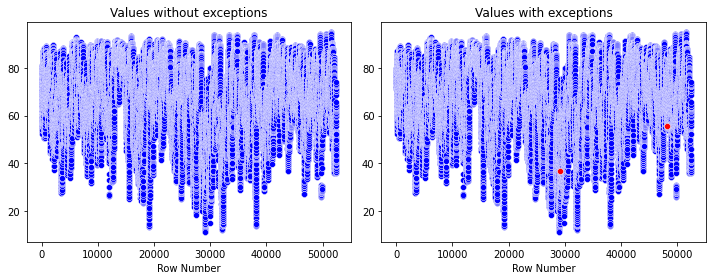

### Columns(s): Wind Speed

**Issue&nbsp;ID**:&nbsp;1

A&nbsp;strong&nbsp;pattern,&nbsp;and&nbsp;exceptions&nbsp;to&nbsp;the&nbsp;pattern,&nbsp;were&nbsp;found.<br>

**Description**:&nbsp;The&nbsp;values&nbsp;in&nbsp;"Wind&nbsp;Speed"&nbsp;are&nbsp;consistently&nbsp;similar&nbsp;to&nbsp;the&nbsp;previous&nbsp;value,&nbsp;more&nbsp;so&nbsp;than&nbsp;they&nbsp;are<br>similar&nbsp;to&nbsp;the&nbsp;median&nbsp;value&nbsp;of&nbsp;the&nbsp;column&nbsp;(0.086),&nbsp;with&nbsp;exceptions.

**Number&nbsp;of&nbsp;exceptions**:&nbsp;1&nbsp;(0.0019%&nbsp;of&nbsp;rows)

**Examples&nbsp;of&nbsp;values&nbsp;NOT&nbsp;flagged&nbsp;(showing&nbsp;a&nbsp;consecutive&nbsp;set&nbsp;of&nbsp;rows)**:

,Wind Speed
32103,4.907000
32104,4.909000
32105,4.908000
32106,4.903000
32107,4.907000
32108,4.908000
32109,4.910000
32110,4.912000
32111,4.908000
32112,4.903000


**Flagged&nbsp;values**:

,Wind Speed
18499,4.917000


Showing&nbsp;a&nbsp;flagged&nbsp;example&nbsp;(row&nbsp;18499)&nbsp;with&nbsp;5&nbsp;rows&nbsp;before&nbsp;and&nbsp;5&nbsp;rows&nbsp;after&nbsp;(if&nbsp;available)&nbsp;the&nbsp;flagged&nbsp;row

,Wind Speed
18494,0.069000
18495,0.068000
18496,0.067000
18497,0.067000
18498,0.070000
18499,4.917000
18500,4.916000
18501,4.918000
18502,4.924000
18503,4.922000


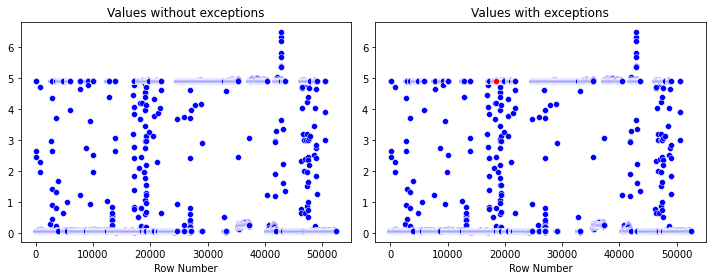

### Columns(s): general diffuse flows

**Issue&nbsp;ID**:&nbsp;2

A&nbsp;strong&nbsp;pattern,&nbsp;and&nbsp;exceptions&nbsp;to&nbsp;the&nbsp;pattern,&nbsp;were&nbsp;found.<br>

**Description**:&nbsp;The&nbsp;values&nbsp;in&nbsp;"general&nbsp;diffuse&nbsp;flows"&nbsp;are&nbsp;consistently&nbsp;similar&nbsp;to&nbsp;the&nbsp;previous&nbsp;value,&nbsp;more&nbsp;so&nbsp;than<br>they&nbsp;are&nbsp;similar&nbsp;to&nbsp;the&nbsp;median&nbsp;value&nbsp;of&nbsp;the&nbsp;column&nbsp;(5.0355),&nbsp;with&nbsp;exceptions.

**Number&nbsp;of&nbsp;exceptions**:&nbsp;160&nbsp;(0.3053%&nbsp;of&nbsp;rows)

**Examples&nbsp;of&nbsp;values&nbsp;NOT&nbsp;flagged&nbsp;(showing&nbsp;a&nbsp;consecutive&nbsp;set&nbsp;of&nbsp;rows)**:

,general diffuse flows
41993,186.000000
41994,204.600000
41995,133.300000
41996,130.200000
41997,147.900000
41998,106.400000
41999,108.700000
42000,112.400000
42001,125.600000
42002,235.600000


**Examples&nbsp;of&nbsp;flagged&nbsp;values**:

,general diffuse flows
2100,547.100000
2529,679.100000
2672,585.200000
2814,157.800000
4692,702.000000
4695,233.100000
4818,259.300000
4832,613.800000
4837,172.200000
4976,674.200000


Showing&nbsp;a&nbsp;flagged&nbsp;example&nbsp;(row&nbsp;2100)&nbsp;with&nbsp;5&nbsp;rows&nbsp;before&nbsp;and&nbsp;5&nbsp;rows&nbsp;after&nbsp;(if&nbsp;available)&nbsp;the&nbsp;flagged&nbsp;row

,general diffuse flows
2095,491.600000
2096,513.200000
2097,428.400000
2098,311.200000
2099,206.200000
2100,547.100000
2101,530.700000
2102,441.000000
2103,461.600000
2104,455.900000


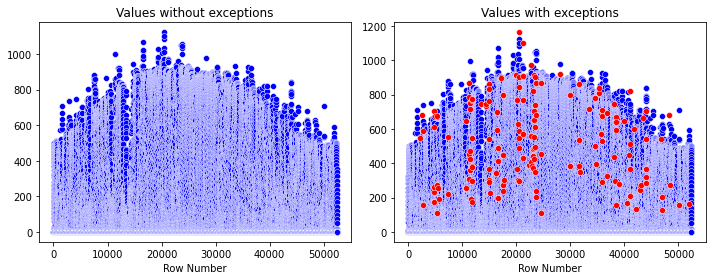

### Columns(s): Zone 1

**Issue&nbsp;ID**:&nbsp;3

A&nbsp;strong&nbsp;pattern,&nbsp;and&nbsp;exceptions&nbsp;to&nbsp;the&nbsp;pattern,&nbsp;were&nbsp;found.<br>

**Description**:&nbsp;The&nbsp;values&nbsp;in&nbsp;"Zone&nbsp;1"&nbsp;are&nbsp;consistently&nbsp;similar&nbsp;to&nbsp;the&nbsp;previous&nbsp;value,&nbsp;more&nbsp;so&nbsp;than&nbsp;they&nbsp;are&nbsp;similar<br>to&nbsp;the&nbsp;median&nbsp;value&nbsp;of&nbsp;the&nbsp;column&nbsp;(32265.92034),&nbsp;with&nbsp;exceptions.

**Number&nbsp;of&nbsp;exceptions**:&nbsp;1&nbsp;(0.0019%&nbsp;of&nbsp;rows)

**Examples&nbsp;of&nbsp;values&nbsp;NOT&nbsp;flagged&nbsp;(showing&nbsp;a&nbsp;consecutive&nbsp;set&nbsp;of&nbsp;rows)**:

,Zone 1
20757,26137.180330
20758,25835.016390
20759,25457.311480
20760,25432.131150
20761,25344.000000
20762,24953.704920
20763,24500.459020
20764,23568.786890
20765,22511.213110
20766,21856.524590


**Flagged&nbsp;values**:

,Zone 1
15769,16814.983850


Showing&nbsp;a&nbsp;flagged&nbsp;example&nbsp;(row&nbsp;15769)&nbsp;with&nbsp;5&nbsp;rows&nbsp;before&nbsp;and&nbsp;5&nbsp;rows&nbsp;after&nbsp;(if&nbsp;available)&nbsp;the&nbsp;flagged&nbsp;row

,Zone 1
15764,35824.843920
15765,36097.653390
15766,36544.068890
15767,37015.285250
15768,36159.655540
15769,16814.983850
15770,17794.617870
15771,26995.737350
15772,26822.131320
15773,26226.910660


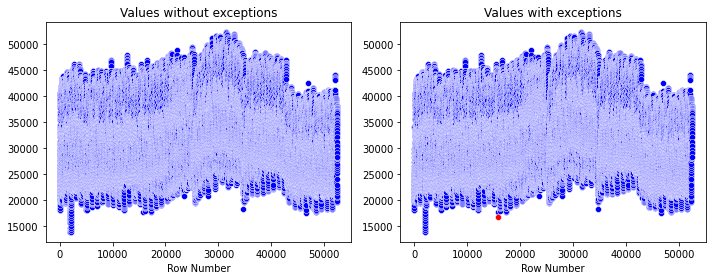

### Columns(s): Zone 2  

**Issue&nbsp;ID**:&nbsp;4

A&nbsp;strong&nbsp;pattern,&nbsp;and&nbsp;exceptions&nbsp;to&nbsp;the&nbsp;pattern,&nbsp;were&nbsp;found.<br>

**Description**:&nbsp;The&nbsp;values&nbsp;in&nbsp;"Zone&nbsp;2&nbsp;&nbsp;"&nbsp;are&nbsp;consistently&nbsp;similar&nbsp;to&nbsp;the&nbsp;previous&nbsp;value,&nbsp;more&nbsp;so&nbsp;than&nbsp;they&nbsp;are<br>similar&nbsp;to&nbsp;the&nbsp;median&nbsp;value&nbsp;of&nbsp;the&nbsp;column&nbsp;(20823.168404999997),&nbsp;with&nbsp;exceptions.

**Number&nbsp;of&nbsp;exceptions**:&nbsp;1&nbsp;(0.0019%&nbsp;of&nbsp;rows)

**Examples&nbsp;of&nbsp;values&nbsp;NOT&nbsp;flagged&nbsp;(showing&nbsp;a&nbsp;consecutive&nbsp;set&nbsp;of&nbsp;rows)**:

,Zone 2
46884,24809.504130
46885,25077.272730
46886,24723.966940
46887,23347.933880
46888,23704.958680
46889,24422.727270
46890,25073.553720
46891,24861.570250
46892,24686.776860
46893,24207.024790


**Flagged&nbsp;values**:

,Zone 2
49602,18244.860390


Showing&nbsp;a&nbsp;flagged&nbsp;example&nbsp;(row&nbsp;49602)&nbsp;with&nbsp;5&nbsp;rows&nbsp;before&nbsp;and&nbsp;5&nbsp;rows&nbsp;after&nbsp;(if&nbsp;available)&nbsp;the&nbsp;flagged&nbsp;row

,Zone 2
49597,24375.575330
49598,24710.647440
49599,24957.348880
49600,25656.949980
49601,26058.300090
49602,18244.860390
49603,22781.221230
49604,25704.817430
49605,25940.472540
49606,26260.816200


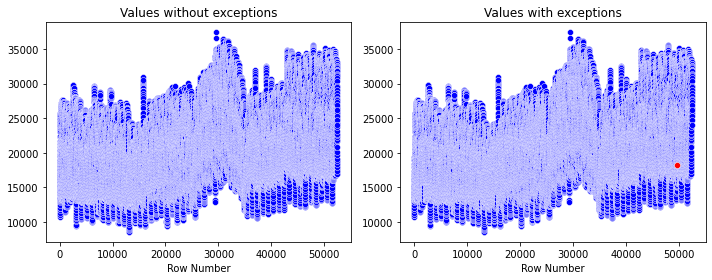

In [22]:
for i in range(10):
  dc.display_detailed_results(issue_id_list=[i])